In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # rawprocessing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Netflix Dataset.csv


In [14]:
# import requirement libraries and tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import torch.functional as F
import plotly.graph_objects as go

from tqdm.notebook import tqdm
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import TensorDataset, DataLoader
import warnings
warnings.filterwarnings("ignore")

In [15]:
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU is available


In [16]:
df = pd.read_csv("/kaggle/input/Netflix Dataset.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [17]:
df[["year", "month", "dates"]] = df["Date"].str.split("-", expand = True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,dates
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,05,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,05,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,05,28
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,05,29
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,05,30


In [18]:
df.shape

(5540, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5540 entries, 0 to 5539
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5540 non-null   object 
 1   Open       5540 non-null   float64
 2   High       5540 non-null   float64
 3   Low        5540 non-null   float64
 4   Close      5540 non-null   float64
 5   Adj Close  5540 non-null   float64
 6   Volume     5540 non-null   int64  
 7   year       5540 non-null   object 
 8   month      5540 non-null   object 
 9   dates      5540 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 432.9+ KB


# EDA

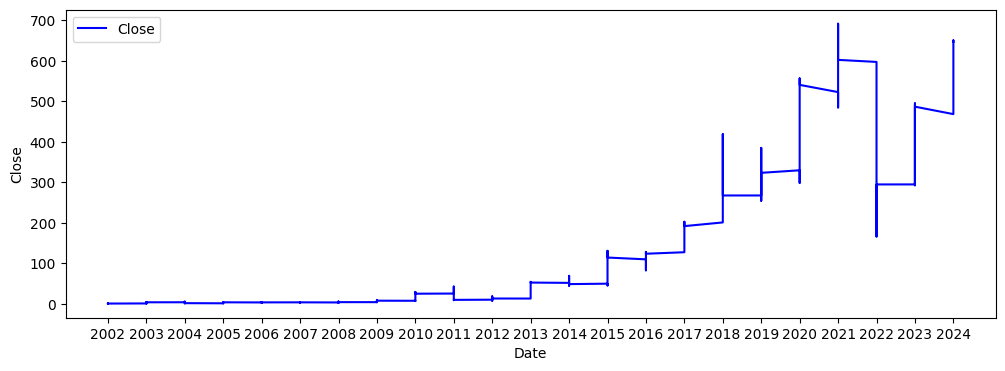

In [20]:
colors = ['blue'] 
plt.figure(figsize=(12, 4))  # Adjust the size as needed
plt.plot(df['year'], df['Close'], color=colors[0], label="Close")
plt.xlabel('Date', fontsize=10)  # Corrected x-axis label function
plt.ylabel("Close", fontsize=10)  # Assuming col is defined elsewhere
plt.legend() # Add a legend for each subplot
plt.show() # Show the plot


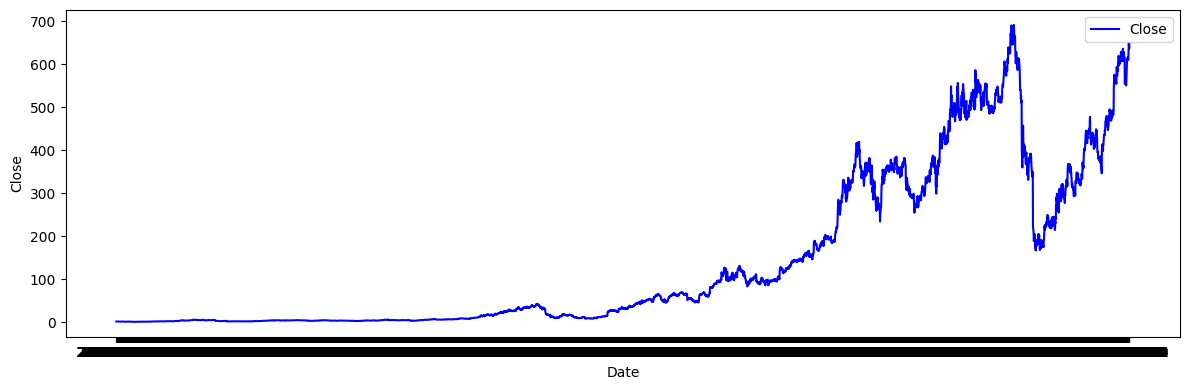

In [21]:
# Assuming df and col are defined elsewhere
colors = ['blue'] 
plt.figure(figsize=(12, 4))  # Adjust the size as needed
plt.plot(df['Date'], df['Close'], color=colors[0], label="Close")
plt.xlabel('Date')  
plt.ylabel("Close")  
plt.legend() 
plt.tight_layout() 
plt.show() 


# Observation

**We can clearly see that stocks were flat for couple of years so we will exculde that data in order to predict correctly and better EDA. You can do same steps on complete data but wont get accuracy.


* > New DATAFrame****

In [22]:
df = df.tail(2500)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,dates
3040,2014-06-20,63.028572,63.268570,62.139999,62.882858,62.882858,13222300,2014,06,20
3041,2014-06-23,62.765713,63.122856,62.221428,62.788570,62.788570,10672900,2014,06,23
3042,2014-06-24,62.578571,64.277145,62.214287,62.337143,62.337143,20367200,2014,06,24
3043,2014-06-25,62.142857,63.537144,61.904285,63.458572,63.458572,15752100,2014,06,25
3044,2014-06-26,62.970001,63.162857,62.392857,62.801430,62.801430,14237300,2014,06,26


In [23]:
df.shape

(2500, 10)

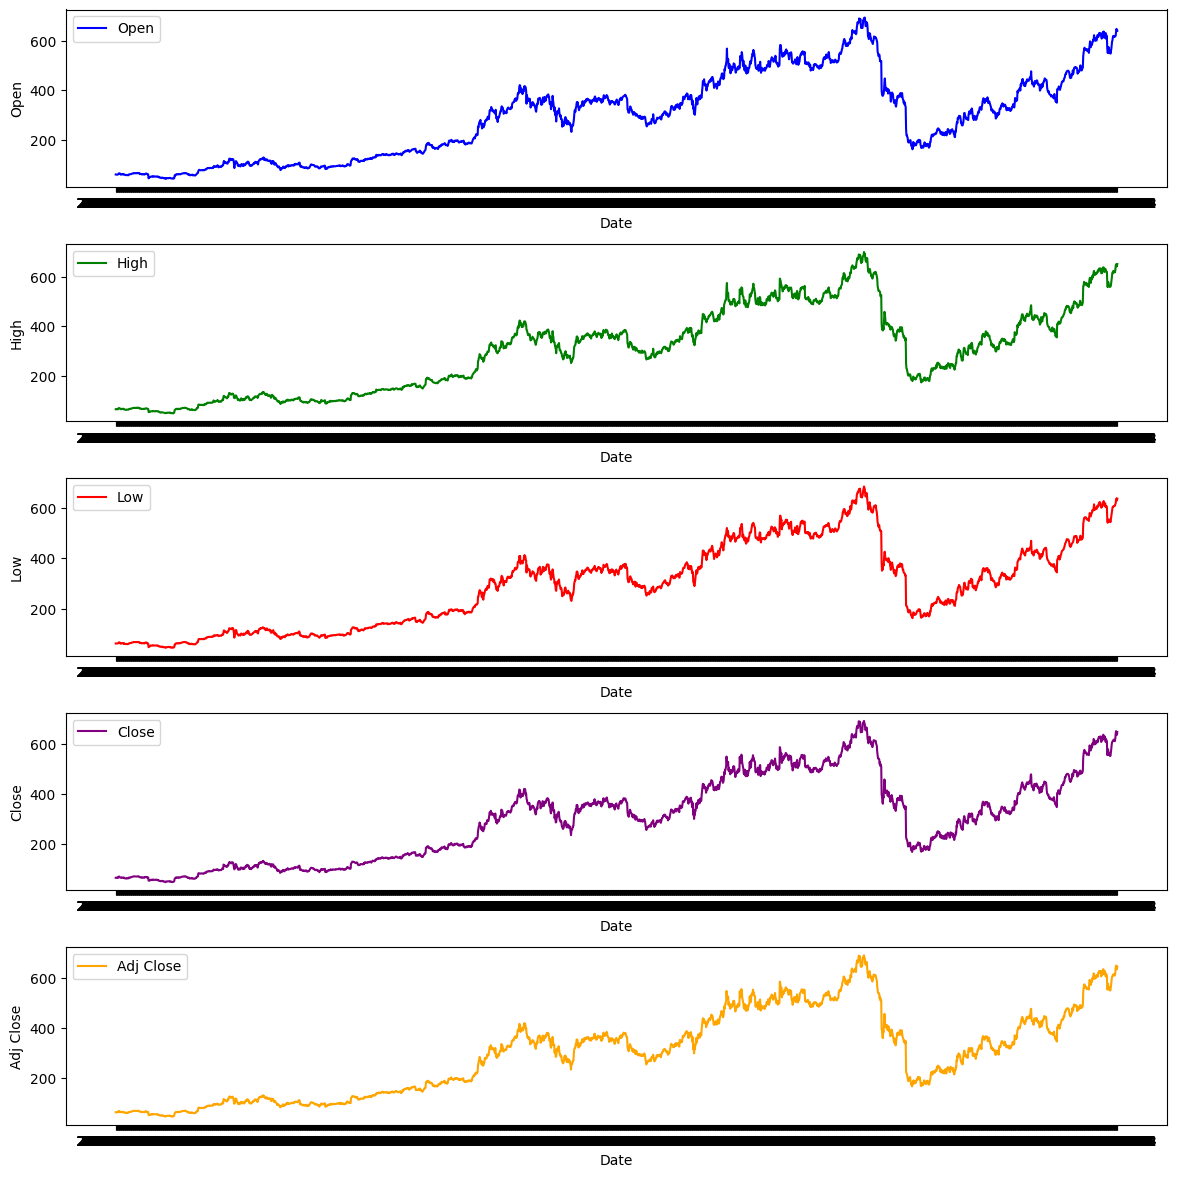

In [24]:
# Create subplots with adjusted figure size
fig, axes = plt.subplots(5, 1, figsize=(12, 12))

# Customize spacing for better readability
fig.tight_layout(pad=2.0)

# Define a color palette for visual distinction (you can customize this)
colors = ['blue', 'green', 'red', 'purple', 'orange'] 

# Iterate through columns and create plots
for index, col in enumerate(df.columns[1:6]):
    axes[index].plot(df['Date'], df[col], color=colors[index], label=col)
    axes[index].set_xlabel('Date', fontsize=10)  # Adjust font size as needed
    axes[index].set_ylabel(col, fontsize=10)
    axes[index].legend() # Add a legend for each subplot
    fig.show() # Show each plot individually within the loop 

# Moving Averages

In [ ]:
# Calculate moving averages
df['MA30'] = df['Close'].rolling(window=30).mean()
df['MA90'] = df['Close'].rolling(window=90).mean()

# Plot closing price with moving averages
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA30'], label='30-Day MA')
plt.plot(df['MA90'], label='90-Day MA')
plt.title('Netflix Closing Price with 30-Day and 90-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(False)
plt.show()


# Volume Analysis

In [ ]:
# Plot trading volume over time
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Netflix Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(False)
plt.show()


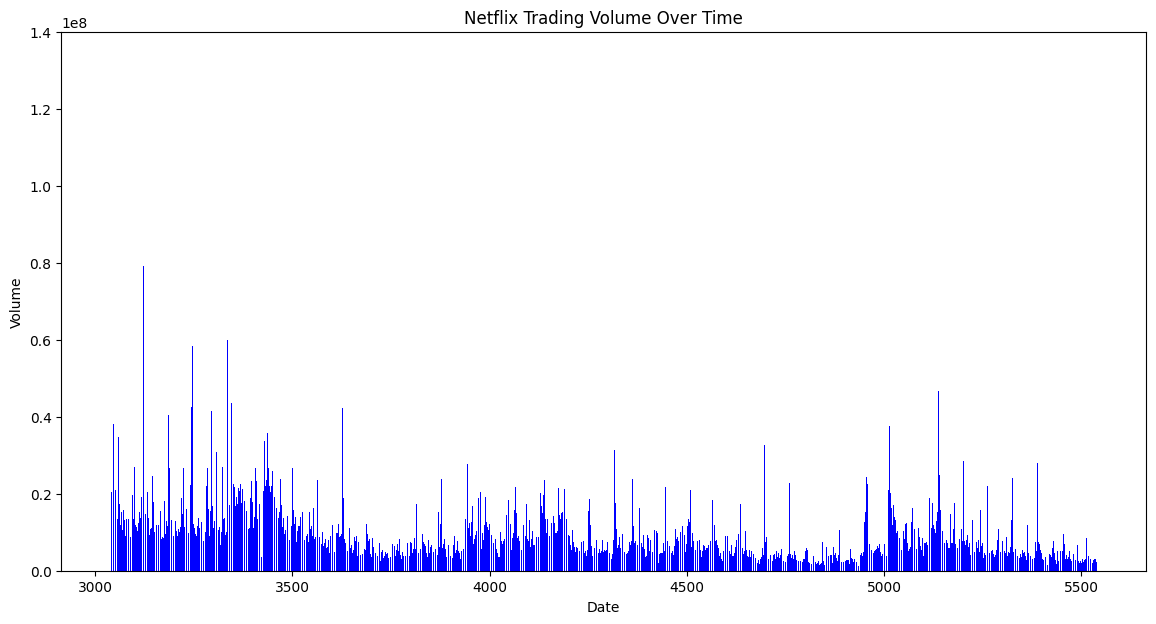

In [27]:
# Plot a bar chart of trading volume over time
plt.figure(figsize=(14, 7))
plt.bar(df.index, df['Volume'], color='blue')
plt.title('Netflix Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()


#  Correlation Heatmap

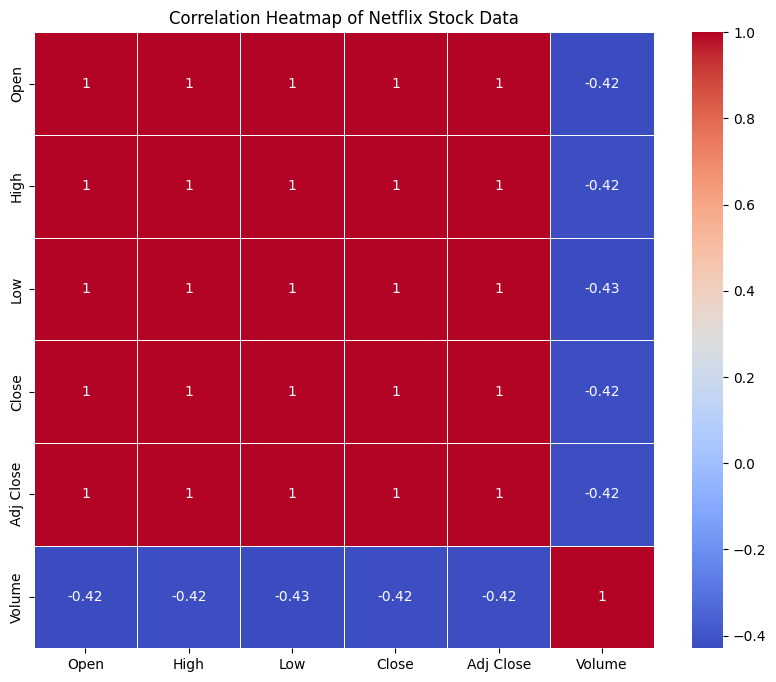

In [28]:
import seaborn as sns

# Calculate correlation matrix
corr_matrix = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Netflix Stock Data')
plt.show()


# Volatility Analysis

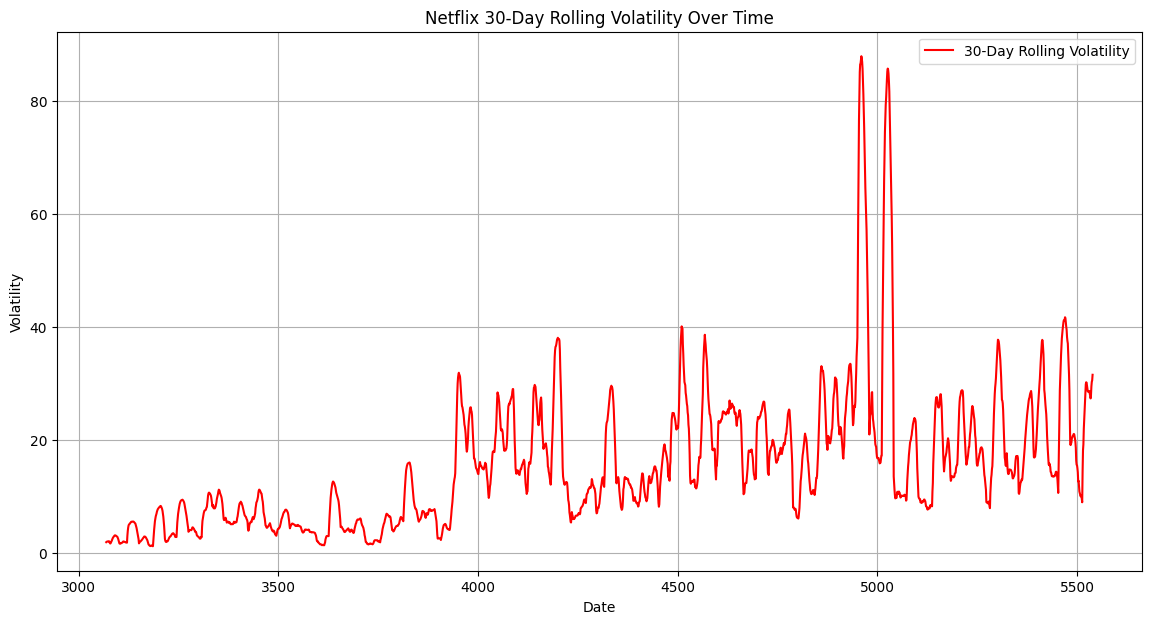

In [29]:
# Calculate rolling standard deviation (volatility)
df['Volatility'] = df['Close'].rolling(window=30).std()

# Plot volatility over time
plt.figure(figsize=(14, 7))
plt.plot(df['Volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Netflix 30-Day Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()


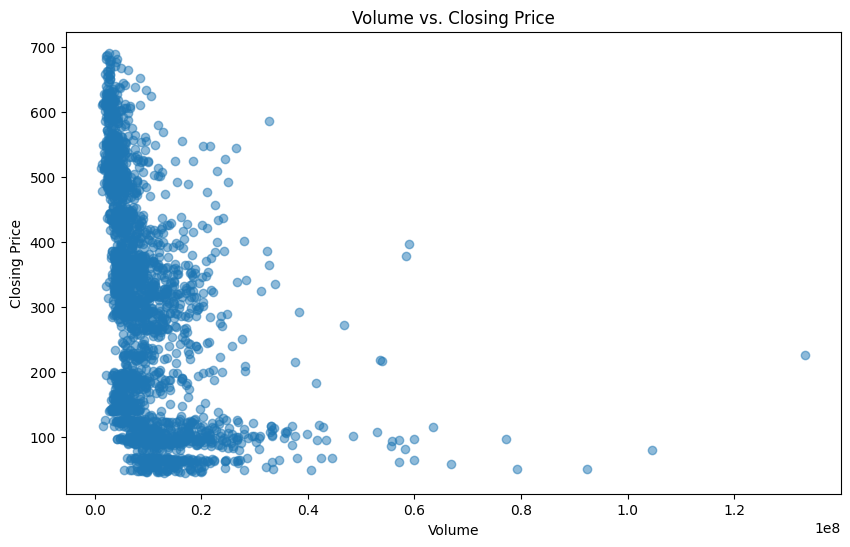

In [30]:
# Scatter Plot: Volume vs. Closing Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.title('Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

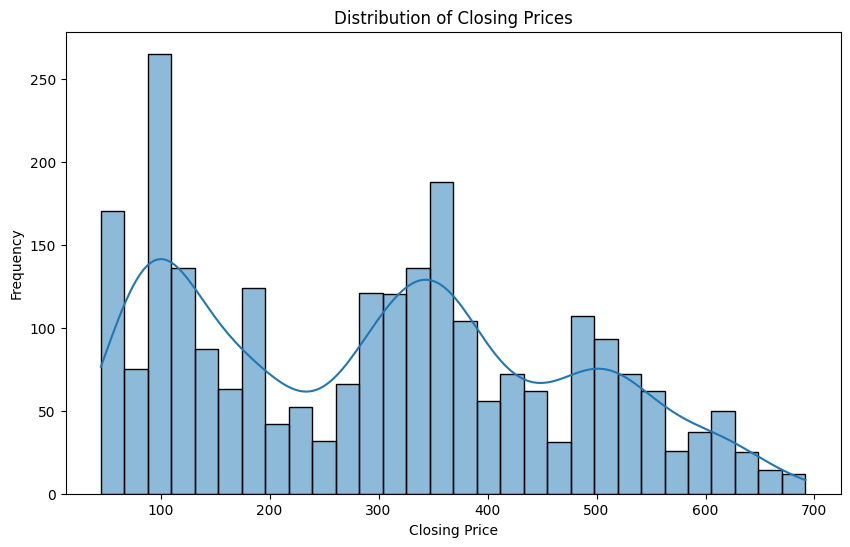

In [31]:
# Histogram: Distribution of Closing Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

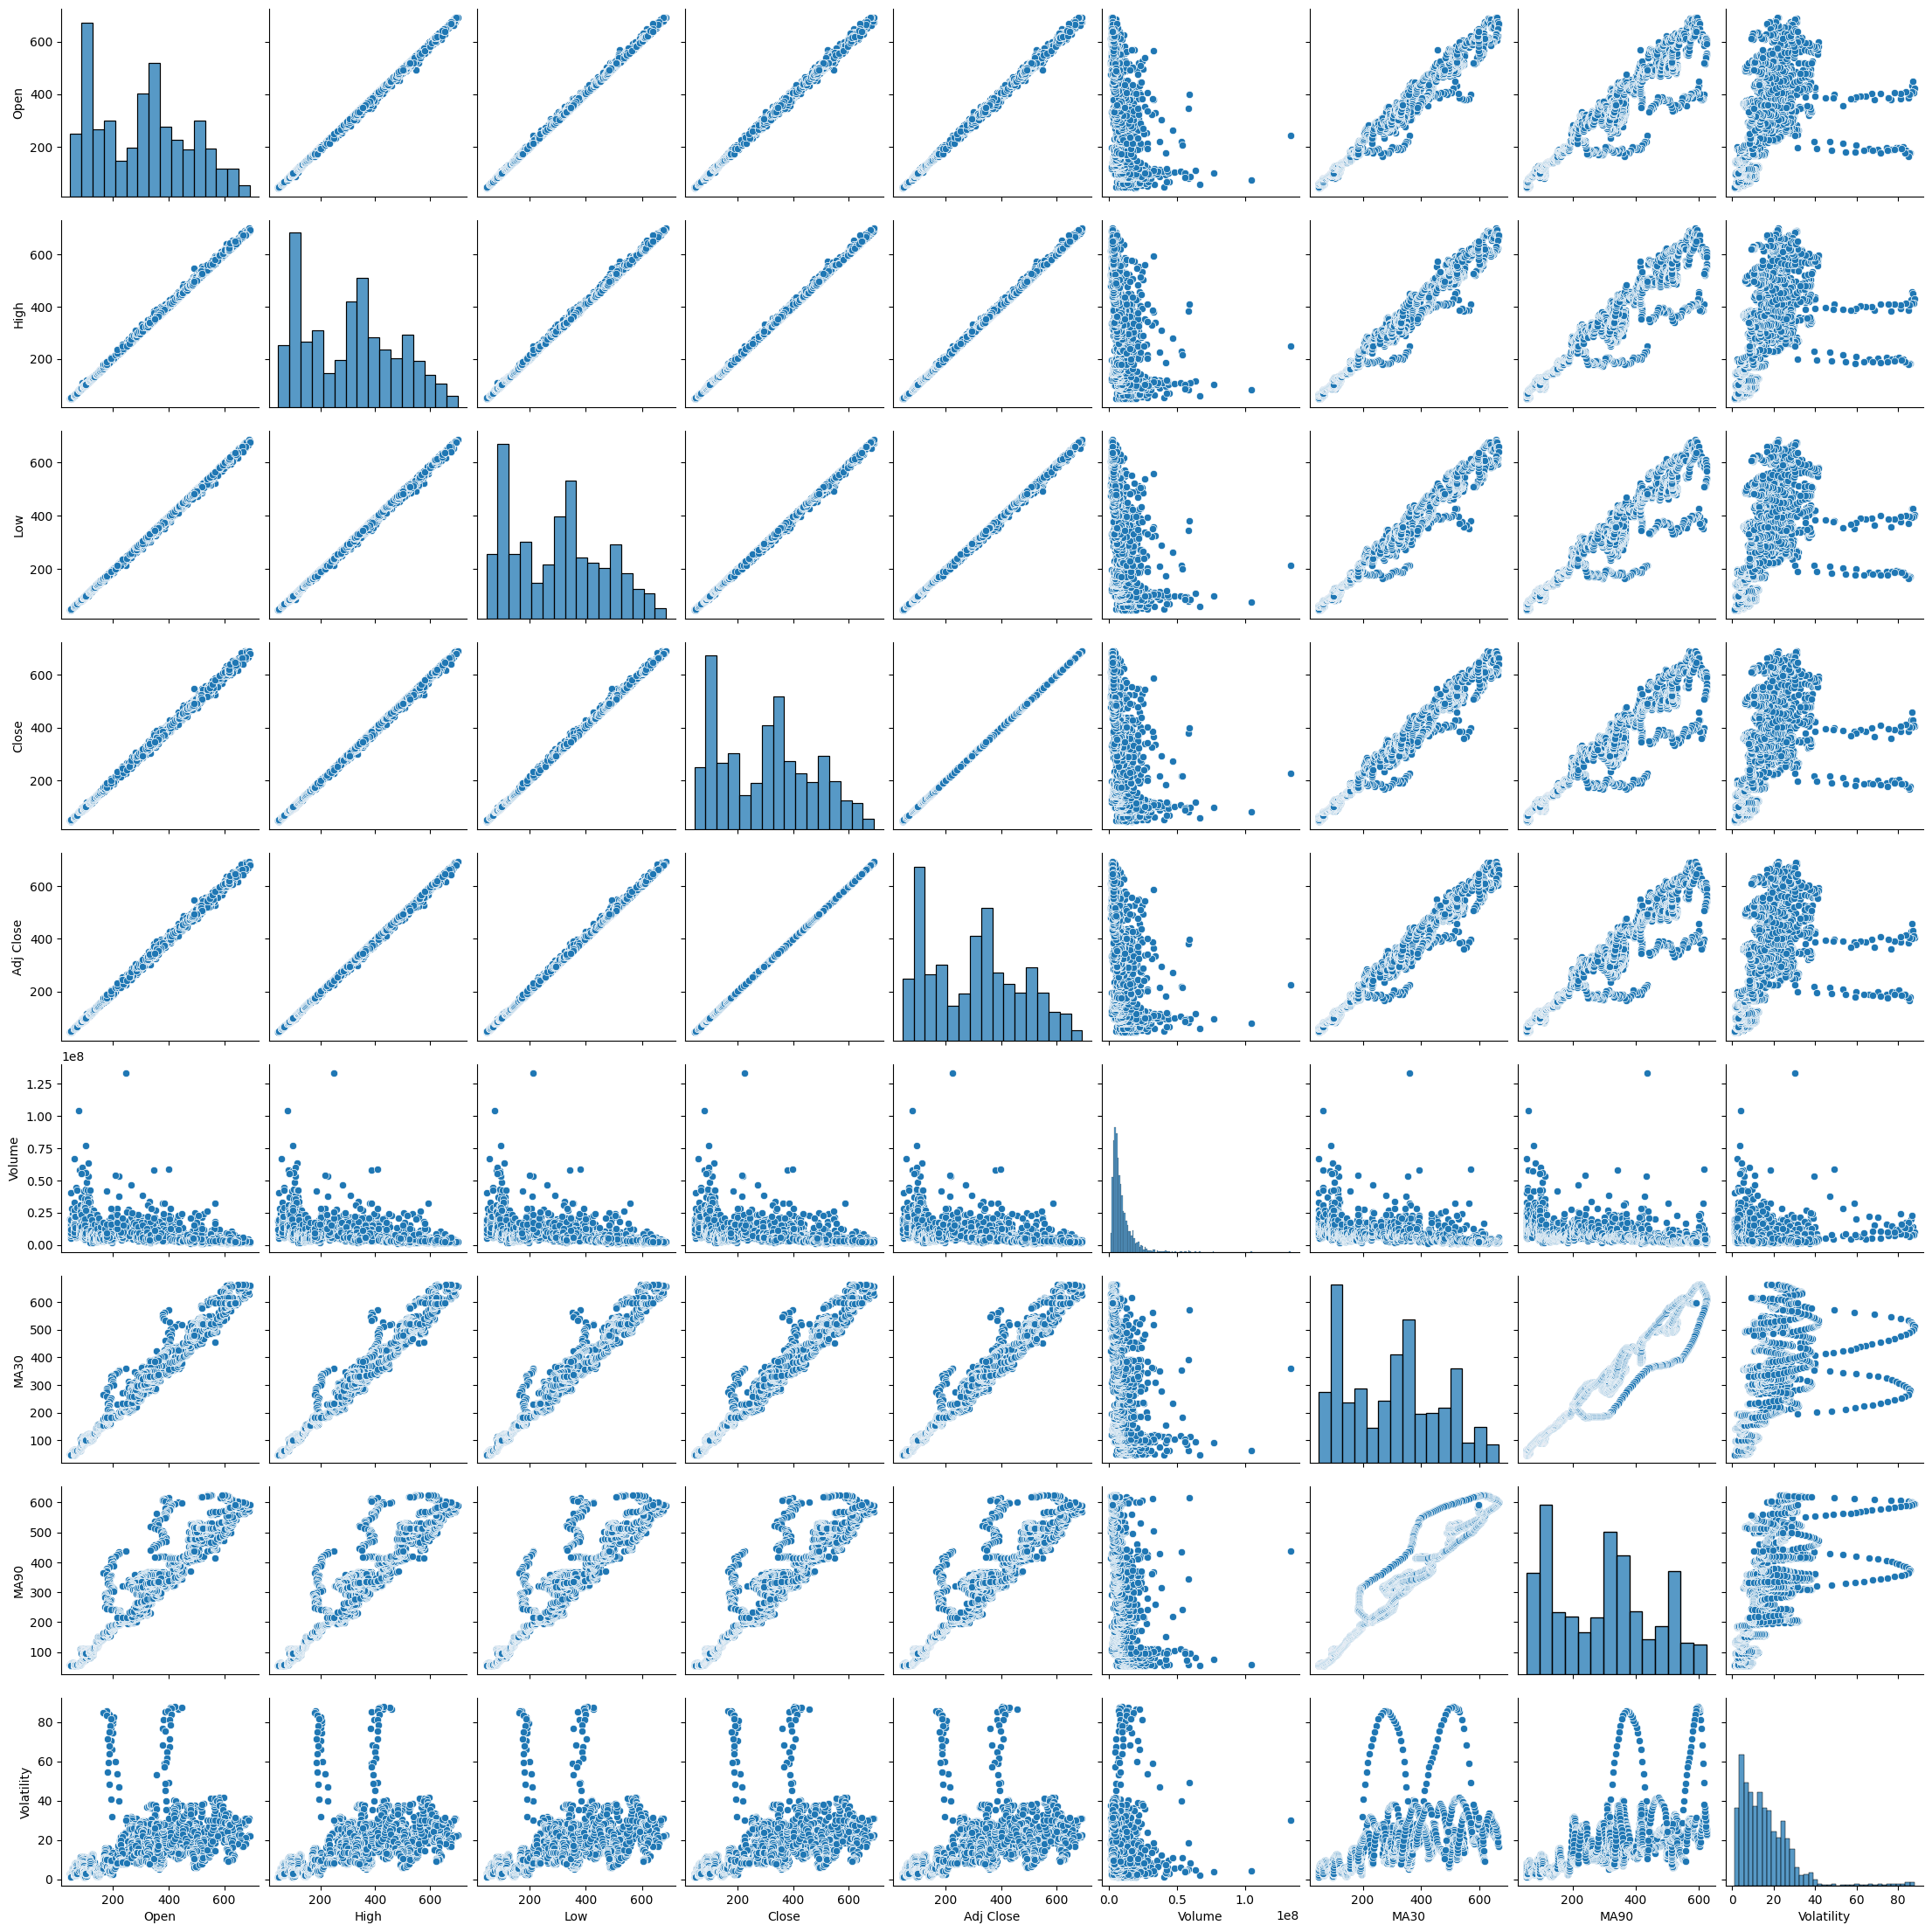

In [32]:
# Pair Plot: Relationships between all numerical columns
sns.pairplot(df.dropna())
plt.show()


<Figure size 700x300 with 0 Axes>

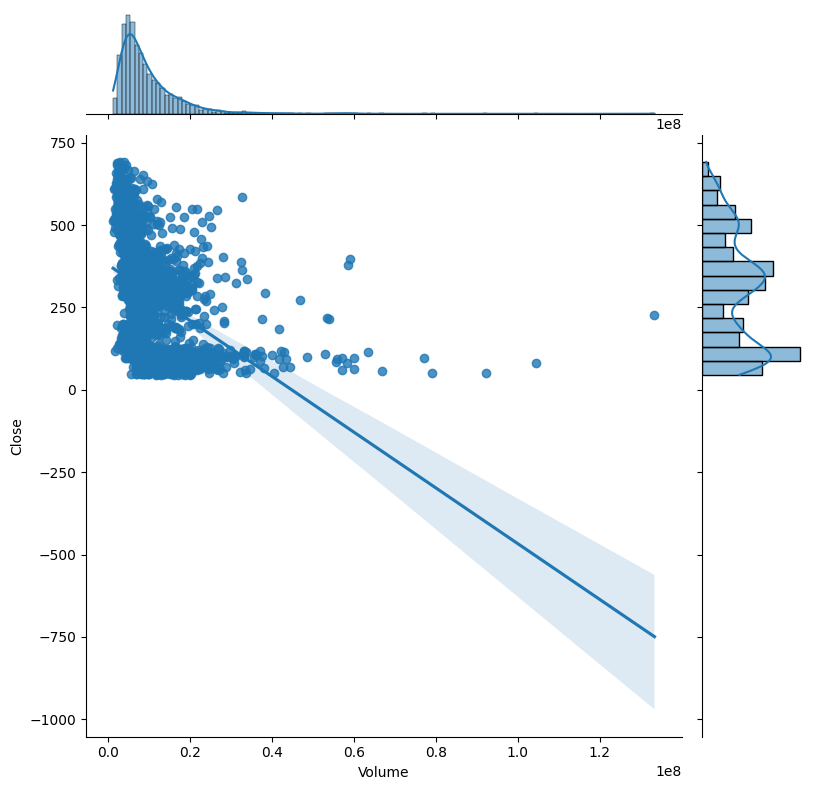

In [33]:
# Joint Plot: Volume vs. Closing Price with regression line
plt.figure(figsize=(7, 3))
sns.jointplot(x='Volume', y='Close', data=df, kind='reg', height=8)
plt.show()

# Data Extraction

In [34]:
df.drop(columns=['Open', 'Close', 'High', 'Low', 'Volume','MA30' ,'MA90', 'Volatility', 'year', 'month', 'dates'], inplace=True)
df.head()

,Date,Adj Close
3040,2014-06-20,62.882858
3041,2014-06-23,62.788570
3042,2014-06-24,62.337143
3043,2014-06-25,63.458572
3044,2014-06-26,62.801430


In [35]:
scaler = MinMaxScaler(feature_range=(-1, 1))
model=scaler.fit(df['Adj Close'].values.reshape(-1,1))
df['Adj Close']=model.transform(df['Adj Close'].values.reshape(-1,1))
df.head()

,Date,Adj Close
3040,2014-06-20,-0.945313
3041,2014-06-23,-0.945605
3042,2014-06-24,-0.947001
3043,2014-06-25,-0.943532
3044,2014-06-26,-0.945565


In [36]:
df["Adj Close"].values.reshape(-1,1)

array([[-0.945313  ],
       [-0.94560469],
       [-0.94700125],
       ...,
       [ 0.84154284],
       [ 0.82669333],
       [ 0.86097109]])

# Test and Train dataset

In [37]:
# function to create train, test data given stock data and sequence length
# we are predicting future so last portion of our data will be recorded as the test dataset example 50000 datapoints last 10k rakhlo future ka lia
def load_data(stock, look_back):
    data_raw = stock.values # convert to numpy array
    data = []
    
    print("len(data_raw): ",len(data_raw))
    
    # create all possible sequences of length look_back
    # we will take data example 0 to 60 then 1 to 61 then 2 to 62 ------ window size 
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index:index + look_back])
    #print(data[0:3])
    data = np.array(data)
    print("data.shape: ", data.shape)

    test_set_size = int(np.round(0.2*data.shape[0])) #20percent for test
    train_set_size = data.shape[0] - (test_set_size)
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 60 # choose sequence length # window size
x_train, y_train, x_test, y_test = load_data(df[["Adj Close"]], look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)

print('y_test.shape = ',y_test.shape)

len(data_raw):  2500
data.shape:  (2440, 60, 1)
x_train.shape =  (1952, 59, 1)
y_train.shape =  (1952, 1)
x_test.shape =  (488, 59, 1)
y_test.shape =  (488, 1)


In [38]:
# x_train,"-----------------", x_test, "----------------------",y_train,"------------------", y_test

# Convert to Tensor

In [39]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [40]:
# x_train

# Define LSTM 

In [41]:
import torch
import torch.nn as nn


# Build model
input_dim = 1
hidden_dim = 100
num_layers = 2
output_dim = 1

# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach())) #.detach() is a PyTorch method that creates a new tensor that does not require gradients. 
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

# for i in range(len(list(model.parameters()))):
#     print(list(model.parameters())[i].size())

# Example forward pass
x_example = torch.randn(10, 5, input_dim).to(device)  # Example input tensor
output_example = model(x_example)
print(output_example)


tensor([[-0.0134],
        [-0.0150],
        [-0.0136],
        [-0.0157],
        [-0.0169],
        [-0.0106],
        [-0.0117],
        [-0.0151],
        [-0.0145],
        [-0.0176]], device='cuda:0', grad_fn=<AddmmBackward0>)


In [42]:
model.to(device)

LSTM(
  (lstm): LSTM(1, 100, num_layers=2, batch_first=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
)

# Train Model

In [43]:
num_epochs = 500
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Forward pass
    x_train = x_train.to(device)
    y_train = y_train.to(device)

    
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()


Epoch  10 MSE:  0.07565575838088989
Epoch  20 MSE:  0.006416474934667349
Epoch  30 MSE:  0.003676120424643159
Epoch  40 MSE:  0.002779756672680378
Epoch  50 MSE:  0.0018247496336698532
Epoch  60 MSE:  0.0014483884442597628
Epoch  70 MSE:  0.0013619345845654607
Epoch  80 MSE:  0.0012753913179039955
Epoch  90 MSE:  0.0012319175293669105
Epoch  100 MSE:  0.0011930449400097132
Epoch  110 MSE:  0.0011655137641355395
Epoch  120 MSE:  0.0011420139344409108
Epoch  130 MSE:  0.001120263827033341
Epoch  140 MSE:  0.0010998366633430123
Epoch  150 MSE:  0.0010804501362144947
Epoch  160 MSE:  0.0010620513930916786
Epoch  170 MSE:  0.0010445835068821907
Epoch  180 MSE:  0.0010280305286869407
Epoch  190 MSE:  0.0010123212123289704
Epoch  200 MSE:  0.0009973468258976936
Epoch  210 MSE:  0.0009830232011154294
Epoch  220 MSE:  0.0009694063337519765
Epoch  230 MSE:  0.0009565402870066464
Epoch  240 MSE:  0.0009440609137527645
Epoch  250 MSE:  0.0009318076772615314
Epoch  260 MSE:  0.0009197797626256943
E

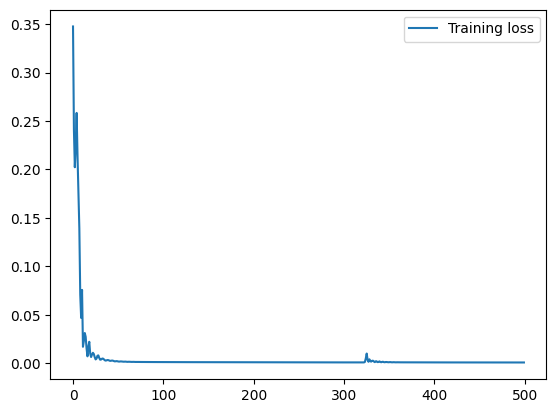

In [44]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()


# Make Predictions


In [45]:
x_test = x_test.to(device)
y_test_pred = model(x_test)

# Transfer to CPU

In [46]:
y_test_pred = y_test_pred.cpu().detach().numpy()
y_test= y_test.cpu().detach().numpy()
x_train= x_train.cpu().detach().numpy()
x_test= x_test.cpu().detach().numpy()
y_train= y_train.cpu().detach().numpy()

In [47]:
y_test_pred.shape, y_test.shape

((488, 1), (488, 1))

# Accuracy score

In [48]:
from sklearn.metrics import r2_score 
r2 = r2_score(y_test_pred, y_test) 
print('r2 score for perfect model is', r2) 

r2 score for perfect model is 0.9935985699092591


In [49]:
# y_test_pred,y_test

# Inverse transform

to see how accurate our results are on line Graph

In [50]:
# Inverse transform y_test_pred and y_test
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).flatten()

In [51]:
len(y_train), len(y_test)

(1952, 488)

# Results

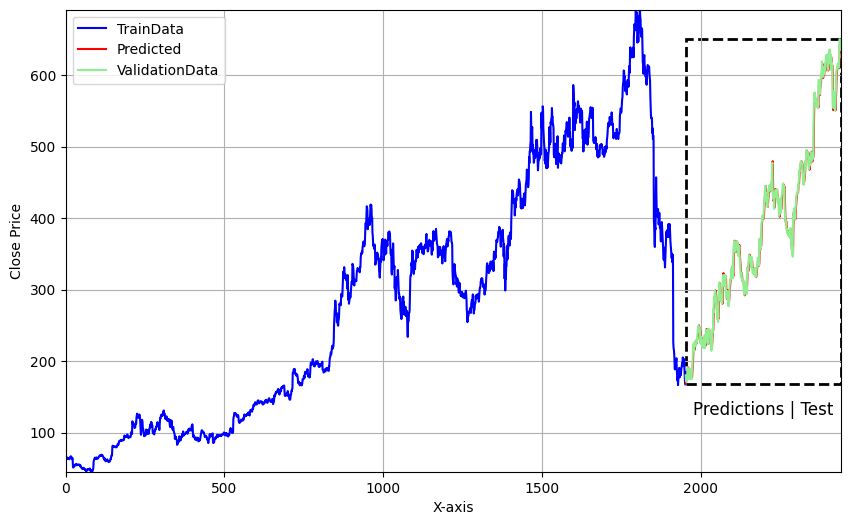

In [52]:
import matplotlib.patches as patches

# Assuming y_train, y_test_pred, and y_test are already defined
# Create the plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Plot y_train with a different color
plt.plot(range(len(y_train)), y_train, label='TrainData', color='blue')  

# Plot y_test_pred and y_test with different colors
plt.plot(range(len(y_train), len(y_train) + len(y_test_pred)), y_test_pred, label='Predicted', color='red')
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, label='ValidationData', color='lightgreen')

# Set the y-axis limits based on the minimum and maximum values of both arrays
plt.ylim(min(y_train.min(), y_test_pred.min(), y_test.min()), max(y_train.max(), y_test_pred.max(), y_test.max()))

# Set the x-axis limits
plt.xlim(0, len(y_train) + len(y_test))

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Close Price')

# Display the legend
plt.legend()

# Add a square around the y_test_pred
ax = plt.gca()
rect = patches.Rectangle((len(y_train), min(y_test_pred.min(), y_test.min())), len(y_test_pred), 
                         max(y_test_pred.max(), y_test.max()) - min(y_test_pred.min(), y_test.min()), 
                         linewidth=2, edgecolor='black', facecolor='none', linestyle='--')
ax.add_patch(rect)

# Add text label to the rectangle
plt.text(len(y_train) + len(y_test_pred) / 2, min(y_test_pred.min(), y_test.min()) - 0.05 * (max(y_test_pred.max(), y_test.max()) - min(y_test_pred.min(), y_test.min())), 
         'Predictions | Test', horizontalalignment='center', verticalalignment='top', fontsize=12, color='black')

# Show the plot
plt.grid(True)  # Add a grid if desired
plt.show()
